In [25]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.metrics import Precision, Recall
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
import seaborn as sns
import cv2
import pathlib
import os
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
from skimage.data import gravel
from skimage.filters import difference_of_gaussians, window
from scipy.fft import fftn, fftshift


In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle_jsons"

In [28]:
%cd /content/drive/MyDrive/kaggle_jsons

/content/drive/MyDrive/kaggle_jsons


In [29]:
!ls

images	kaggle.json  sample_submission.csv  test.csv  train.csv


In [30]:
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.layers import Dense
import pandas as pd

In [31]:
dataset_folder = '/content/drive/MyDrive/kaggle_jsons'
datasetObject = pd.read_csv(os.path.join(dataset_folder, "train.csv"))
datasetObject.head()

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0


In [32]:
imagesDataset = pathlib.Path(os.path.join(dataset_folder, "images"))
listImages = list(imagesDataset.glob("*.*"))

(512, 512) (1365, 2048, 3)


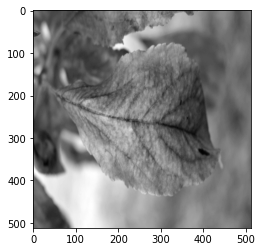

In [33]:
img = cv2.imread(str(listImages[0]))

gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_image = gray_image/255.0
gray_image = cv2.resize(gray_image, (512, 512))
plt.imshow(gray_image, cmap='gray')

print(f'{gray_image.shape} {img.shape}')

plt.show()

In [34]:
all_images = []
for i in range(0, len(listImages)):
  img = cv2.imread(str(listImages[i]))
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (100, 100))
  all_images.append(img)

In [35]:
temp = []
for i in range(1821, len(all_images)):
  temp.append(all_images[i])
print(len(temp))
all_images = temp

1821


In [36]:
healthy = 0
rust = 0
multi = 0
scab = 0
Values = datasetObject.values
for i in range(0, len(Values)):
  if Values[i][1] == 1:
    healthy+=1
  if Values[i][2] == 1:
    multi+=1
  if Values[i][3] == 1:
    rust+=1
  if Values[i][4] == 1:
    scab+=1
print(f'{scab} {rust} {healthy} {multi}')  

592 622 516 91


In [37]:
type(all_images)

list

In [38]:
all_images = np.asarray(all_images)
type(all_images)
all_images.shape

(1821, 100, 100)

In [39]:
labels = []
disease = ['healthy', 'multi', 'rust', 'scab']
for i in range(0, len(Values)):
  #healthy
  if Values[i][1] == 1:
    labels.append(0)
  
  #multi disease
  if Values[i][2] == 1:
    labels.append(1)
  
  #rust
  if Values[i][3] == 1:
    labels.append(2)
  #scab
  if Values[i][4] == 1:
    labels.append(3)

In [40]:
print(len(labels))
print(labels)

1821
[3, 1, 0, 2, 0, 0, 1, 3, 3, 0, 2, 3, 3, 0, 2, 2, 3, 3, 0, 3, 3, 2, 3, 2, 0, 1, 2, 3, 3, 3, 3, 2, 3, 0, 2, 2, 1, 2, 2, 2, 3, 3, 3, 0, 3, 2, 0, 2, 3, 3, 2, 3, 3, 0, 0, 0, 3, 2, 2, 2, 2, 3, 1, 0, 2, 3, 0, 0, 0, 2, 0, 2, 0, 3, 1, 2, 3, 0, 3, 3, 3, 2, 2, 3, 3, 3, 0, 2, 0, 2, 0, 3, 2, 2, 0, 1, 2, 2, 2, 0, 0, 3, 2, 0, 1, 0, 3, 3, 2, 2, 3, 0, 3, 1, 2, 2, 3, 2, 2, 3, 2, 2, 1, 0, 2, 3, 2, 3, 1, 2, 3, 2, 2, 2, 0, 0, 0, 0, 3, 2, 3, 2, 3, 3, 0, 3, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 0, 3, 2, 2, 3, 0, 3, 3, 1, 2, 3, 3, 0, 0, 3, 3, 2, 0, 1, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 0, 3, 3, 0, 0, 3, 0, 2, 3, 3, 2, 2, 3, 2, 3, 3, 3, 2, 0, 3, 0, 3, 3, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 2, 3, 3, 1, 3, 2, 3, 3, 2, 1, 0, 3, 2, 2, 3, 3, 2, 1, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 0, 3, 3, 2, 3, 0, 3, 0, 2, 2, 3, 2, 0, 2, 3, 3, 0, 3, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 2, 0, 3, 3, 0, 2, 0, 2, 2, 3, 0, 3, 1, 0, 3, 3, 3, 0, 3, 2, 2, 3, 3, 0, 2, 3, 0, 2, 2, 2, 3, 3, 3, 2, 2, 0, 0, 2

In [41]:
#normalization
#uncomment for the first time only 
all_images = all_images /255.0

In [42]:
#returning the numpy array to a list again after normalization
all_images = list(all_images)

In [43]:
all_images[0]

array([[0.06666667, 0.0745098 , 0.08627451, ..., 0.29019608, 0.27843137,
        0.25882353],
       [0.05882353, 0.07843137, 0.08627451, ..., 0.27058824, 0.27058824,
        0.25882353],
       [0.05882353, 0.0745098 , 0.09411765, ..., 0.28627451, 0.31764706,
        0.30196078],
       ...,
       [0.63529412, 0.61960784, 0.60392157, ..., 0.6627451 , 0.72156863,
        0.67843137],
       [0.65490196, 0.63529412, 0.60784314, ..., 0.70196078, 0.72941176,
        0.72941176],
       [0.64705882, 0.6745098 , 0.62352941, ..., 0.73333333, 0.7254902 ,
        0.72156863]])

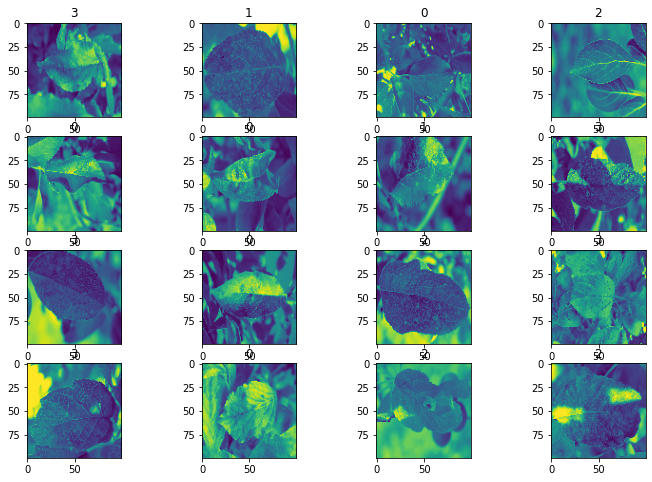

In [44]:
plt.figure(figsize = (12, 8))
for i in range(16):
  plt.subplot(4, 4, i + 1)
  plt.imshow(all_images[i])
  plt.title(labels[i])
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(all_images, labels, test_size = 0.15, random_state = 42)

In [46]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [58]:
x_train = x_train.reshape(-1, 10000)
x_test = x_test.reshape(-1, 10000)
print(x_train.shape)

(1547, 10000)


In [104]:
from sklearn.svm import SVC
 
model = SVC(kernel="linear", C=float(0.1), probability=True)
y_score = model.fit(x_train, y_train)

In [105]:
acc = model.score(x_test, y_test)
print(f"accuracy = {acc}")

accuracy = 0.3357664233576642


In [106]:
print(y_score)

SVC(C=0.1, kernel='linear', probability=True)


In [107]:
prediction = model.predict(x_test)

In [108]:
predictoin = np.argmax(prediction)
print(prediction[0])
print(y_test[0])

3
2


In [109]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
n_errors = (prediction != y_test).sum()
print("The model used is support vector machine")
  
acc = accuracy_score(y_test, prediction)
print("The accuracy is {}".format(acc))
  
# prec = precision_score(y_test, prediction)
# print("The precision is {}".format(prec))
  
# rec = recall_score(y_test, prediction)
# print("The recall is {}".format(rec))
  
# f1 = f1_score(y_test, prediction)
# print("The F1-Score is {}".format(f1))
  
MCC = matthews_corrcoef(y_test, prediction)
print("The Matthews correlation coefficient is{}".format(MCC))

The model used is support vector machine
The accuracy is 0.3357664233576642
The Matthews correlation coefficient is0.04306422228539131


In [110]:
#Roc curve 
#prediction probablitlies true positives , false positives 




#contains the values of predictions using the logestic regression model 
sv_probs = model.predict_proba(x_test)

In [111]:
print(sv_probs[0])

[0.23670385 0.04967907 0.33120135 0.38241573]


In [112]:
#calculating auroc curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
sv_auc = roc_auc_score(y_test,(sv_probs), multi_class='ovr') 

In [113]:
print('svm AUROC =  %.3f' % (sv_auc))

svm AUROC =  0.479


In [114]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(274, 4)

In [115]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([0])

array([[1, 0, 0, 0]])

In [116]:
class_of_interest = 0
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

0

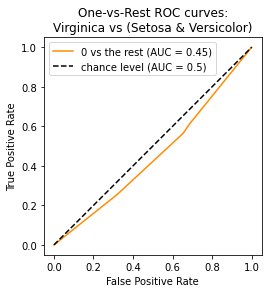

In [122]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    prediction,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

1


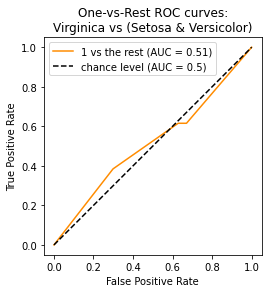

In [123]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([1])
class_of_interest = 1
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    prediction,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

2


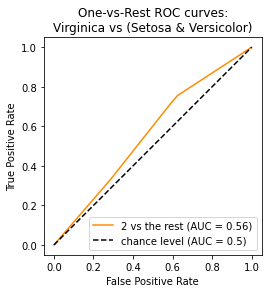

In [124]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([2])
class_of_interest = 2
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    prediction,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

3


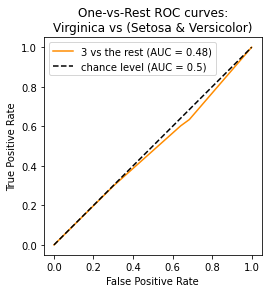

In [125]:
#check the encoding of a specific class: we have classes [0, 1, 2 ,3]
label_binarizer.transform([3])
class_of_interest = 3
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
print(class_id)
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(
    y_onehot_test[:, class_id],
    prediction,
    name=f"{class_of_interest} vs the rest",
    color="darkorange",
)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\nVirginica vs (Setosa & Versicolor)")
plt.legend()
plt.show()

In [132]:
#confustion matrix 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)


array([[30,  4, 24, 20],
       [ 5,  0,  3,  5],
       [22,  4, 34, 30],
       [34,  3, 28, 28]])